In [1]:
#@title Connect to gdrive
import google.colab.drive
google.colab.drive.mount('/content/drive/')

Mounted at /content/drive/


HERE WE DO THE ANALYSIS OF THE DATA OF ROMANIA

In [4]:
#@title Load the precomputed centrality measures
import pandas as pd
# Load the CSV file into a DataFrame
input_csv_file = "node_data_RO_v2.csv"
df_nodes = pd.read_csv(input_csv_file)

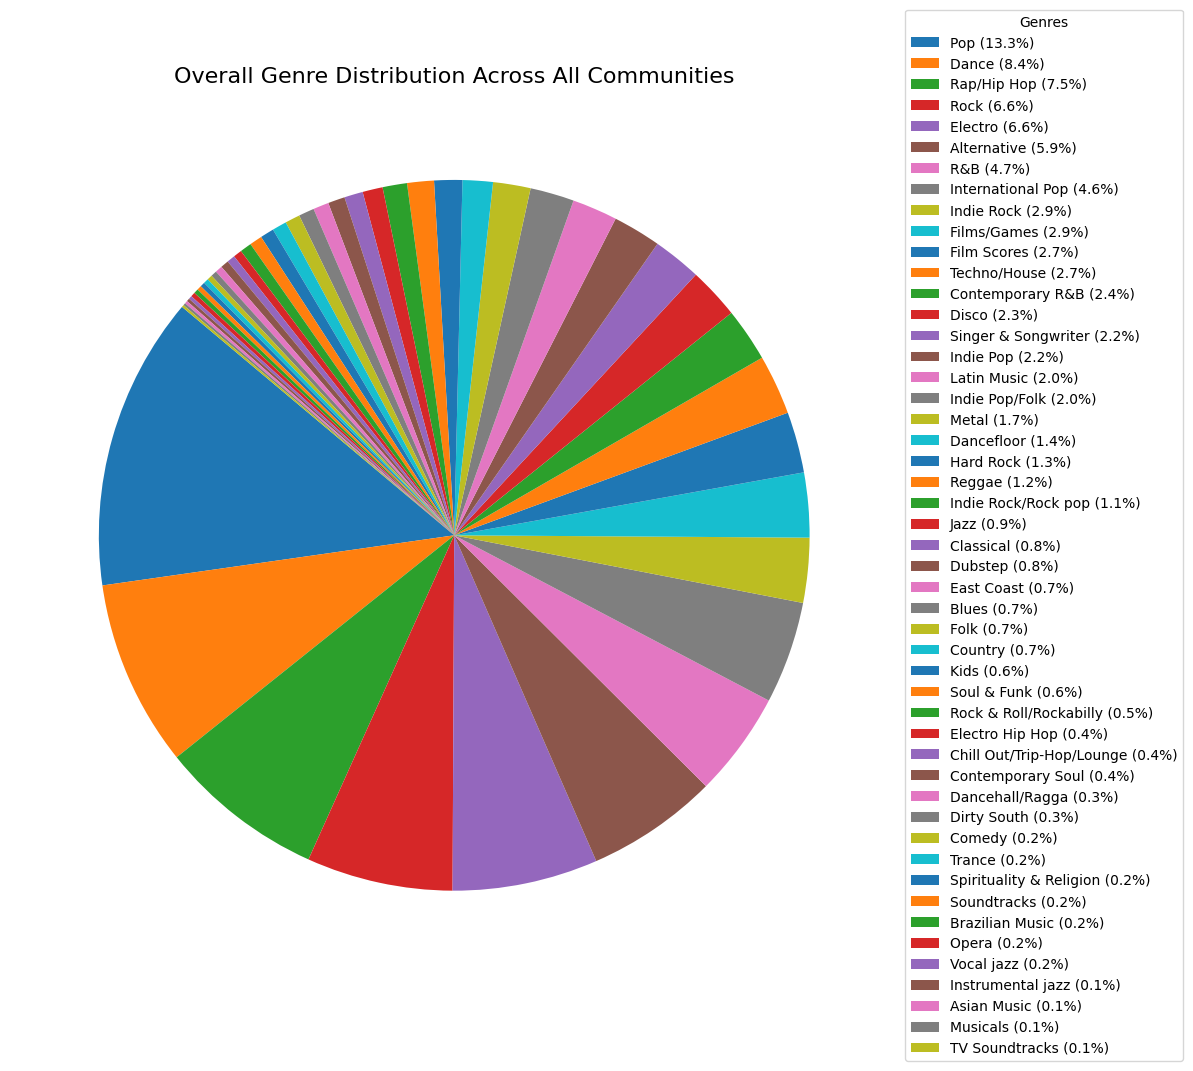

In [5]:
#@title Overall genre distribution
from collections import Counter
import matplotlib.pyplot as plt

# Extract genres from the DataFrame
all_genres = []
for genres in df_nodes['genres']:
    all_genres.extend(eval(genres))  # Convert stringified list to actual list and extend the genre list

# Count genre occurrences
overall_genre_count = Counter(all_genres)

# Calculate total count for percentages
total_count = sum(overall_genre_count.values())

# Filter genres with percentages >= 0.1% and sort them by percentage descending
filtered_genres = {
    genre: count for genre, count in overall_genre_count.items()
    if (count / total_count * 100) >= 0.1
}
sorted_genres = sorted(
    filtered_genres.items(),
    key=lambda x: x[1] / total_count,
    reverse=True
)

# Create labels with percentages for the legend
labels_with_percentages = [
    f"{genre} ({count / total_count * 100:.1f}%)"
    for genre, count in sorted_genres
]

# Get the sorted values for the pie chart
values = [count for _, count in sorted_genres]

# Plot pie chart without labels directly on the chart
plt.figure(figsize=(12, 12))  # Adjust figure size for better spacing
wedges, texts = plt.pie(
    values,
    labels=None,  # No labels directly on the chart
    startangle=140,
    textprops={'fontsize': 10}
)

# Add a legend with genre labels and percentages
plt.legend(
    wedges,
    labels_with_percentages,
    title="Genres",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Add chart title
plt.title("Overall Genre Distribution Across All Communities", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


##Insights

The genres with the largest slices in the pie chart—Pop (13.3%), Dance (8.9%), and Rap/Hip Hop (8.0%)—indicate that they are likely central within user communities. These genres have strong intra-community connections, as they dominate user preferences.
Rock (7.4%), Electro (6.5%), and Alternative (6.2%) also show significant presence, suggesting that they might form the core around which specific communities are built.

The correlations dataset has been saved to: genre_diversity_centrality_correlations.csv


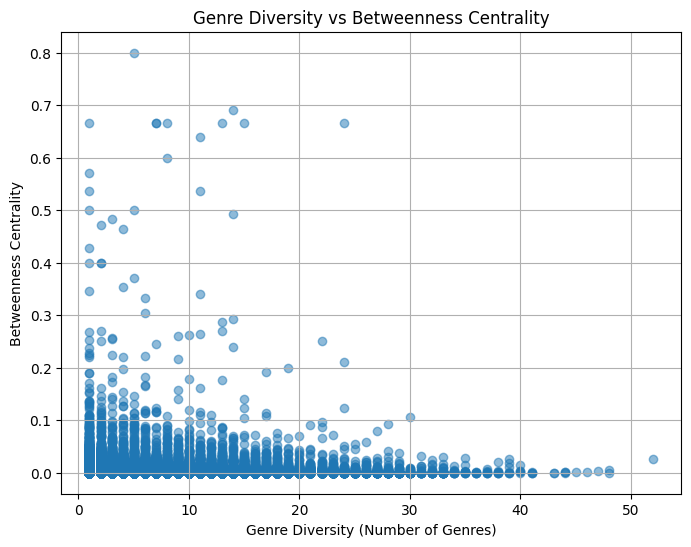

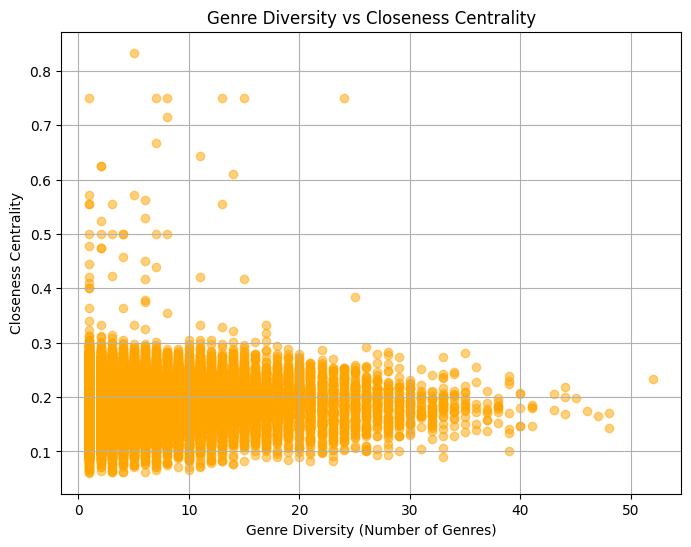

Correlation Matrix:
                        genre_count  betweenness_centrality  \
genre_count                1.000000                0.002877   
betweenness_centrality     0.002877                1.000000   
degree_centrality          0.001432                0.761403   
closeness_centrality       0.028805                0.374314   

                        degree_centrality  closeness_centrality  
genre_count                      0.001432              0.028805  
betweenness_centrality           0.761403              0.374314  
degree_centrality                1.000000              0.489058  
closeness_centrality             0.489058              1.000000  


In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

node_data = pd.read_csv(input_csv_file)

# Step 1: Calculate Genre Diversity
node_data['genre_count'] = node_data['genres'].apply(lambda x: len(eval(x)))

# Step 2: Compute Correlation Matrix
correlations = node_data[['genre_count', 'betweenness_centrality', 'degree_centrality', 'closeness_centrality']].corr()

# Step 3: Save the Correlation Matrix to CSV
output_path = 'genre_diversity_centrality_correlations.csv'
correlations.to_csv(output_path)

# Print save confirmation
print(f"The correlations dataset has been saved to: {output_path}")

# Step 4: Visualizations

# Visualization 1: Genre Diversity vs Betweenness Centrality
plt.figure(figsize=(8, 6))
plt.scatter(node_data['genre_count'], node_data['betweenness_centrality'], alpha=0.5)
plt.title('Genre Diversity vs Betweenness Centrality')
plt.xlabel('Genre Diversity (Number of Genres)')
plt.ylabel('Betweenness Centrality')
plt.grid(True)
plt.show()

# Visualization 2: Genre Diversity vs Closeness Centrality
plt.figure(figsize=(8, 6))
plt.scatter(node_data['genre_count'], node_data['closeness_centrality'], alpha=0.5, color='orange')
plt.title('Genre Diversity vs Closeness Centrality')
plt.xlabel('Genre Diversity (Number of Genres)')
plt.ylabel('Closeness Centrality')
plt.grid(True)
plt.show()

# Display Correlation Matrix
print("Correlation Matrix:")
print(correlations)


# Genre Diversity and Betweenness Centrality

**Romania-Specific Observation:** Users with higher genre diversity do not strongly correlate with bridging roles across communities in the Romanian music network. This may indicate that cross-genre interactions are not heavily dependent on individual users with diverse tastes but rather influenced by broader cultural or community-level dynamics.

**Romanian Music Culture Context:** The observed patterns may reflect how genres in Romania (e.g., traditional Romanian folk, Manele, Pop, Dance, and Electro) often thrive within distinct communities with limited overlap.
Genre Diversity and Closeness Centrality

**Romania-Specific Insight: **Users with moderate genre diversity are slightly more central within their communities in the Romanian network. This could imply that users who engage with 2–3 popular genres in Romania are better positioned to connect within their musical communities.

**Low Correlation of Genre Diversity and Centrality**
**Insight**: The weak correlations suggest that, in Romania, genre diversity alone is not a strong indicator of influence or bridging roles. Other factors, such as geographic proximity, cultural preferences, or engagement with trending artists, may play a larger role.

**Broader Implications for Romania**
**Community Bridging:**
Romania's diverse musical landscape might have communities that are more genre-specific and self-contained, reducing reliance on individuals for cross-genre bridging.

**Localized Musical Preferences:**
Strong local musical identities (e.g., Romanian folk and Manele) may lead to communities that are less influenced by genre-diverse users. This aligns with cultural trends where music taste can be strongly tied to regional and cultural identity.

**Central Users:**
In Romania, individuals who engage with popular genres (e.g., Pop, Dance, Electro) may be more central to their communities but not necessarily bridges to others.

Following the results of the computations, we can observe the following trends.

## Genre Diversity and Betweenness Centrality

**Observation**: The scatter plot shows a weak correlation between genre diversity and betweenness centrality. The points are scattered, and no clear trend is observed.


**Explanation**: Betweenness centrality measures the extent to which a user acts as a bridge connecting different communities. A lack of strong correlation suggests that users with diverse musical tastes are not necessarily playing prominent bridging roles across communities.

In [ ]:
HERE WE DO THE ANALYSIS OF THE DATA OF HUNGARY


The correlations dataset has been saved to: genre_diversity_centrality_correlations.csv


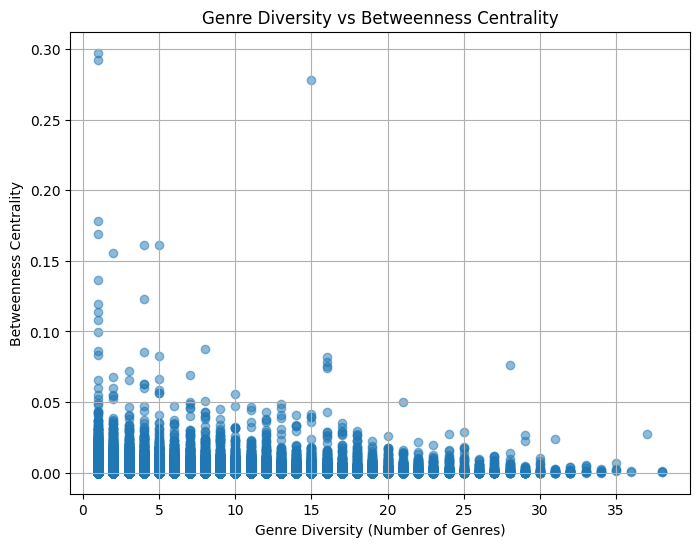

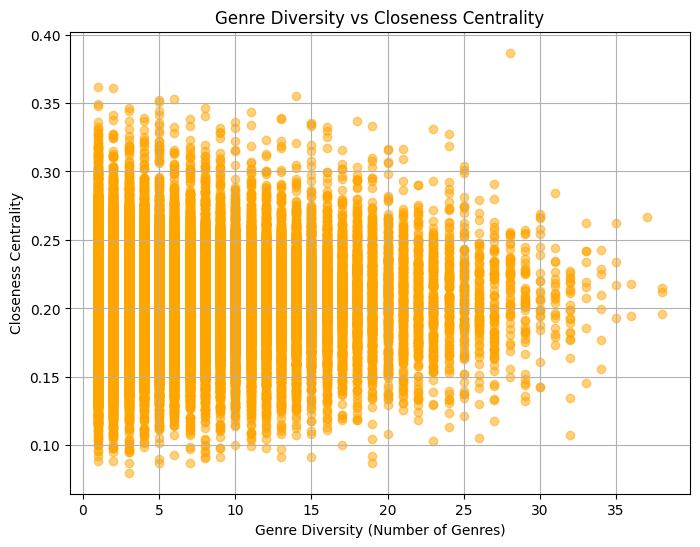

Correlation Matrix:
                        genre_count  betweenness_centrality  \
genre_count                1.000000               -0.006136   
betweenness_centrality    -0.006136                1.000000   
degree_centrality         -0.001903                0.636959   
closeness_centrality       0.000709                0.341304   

                        degree_centrality  closeness_centrality  
genre_count                     -0.001903              0.000709  
betweenness_centrality           0.636959              0.341304  
degree_centrality                1.000000              0.577171  
closeness_centrality             0.577171              1.000000  


In [12]:
input_csv_file = "node_data_HU_v2.csv"
df_nodes = pd.read_csv(input_csv_file)
node_data = pd.read_csv(input_csv_file)

# Step 1: Calculate Genre Diversity
node_data['genre_count'] = node_data['genres'].apply(lambda x: len(eval(x)))

# Step 2: Compute Correlation Matrix
correlations = node_data[['genre_count', 'betweenness_centrality', 'degree_centrality', 'closeness_centrality']].corr()

# Step 3: Save the Correlation Matrix to CSV
output_path = 'genre_diversity_centrality_correlations.csv'
correlations.to_csv(output_path)

# Print save confirmation
print(f"The correlations dataset has been saved to: {output_path}")

# Step 4: Visualizations

# Visualization 1: Genre Diversity vs Betweenness Centrality
plt.figure(figsize=(8, 6))
plt.scatter(node_data['genre_count'], node_data['betweenness_centrality'], alpha=0.5)
plt.title('Genre Diversity vs Betweenness Centrality')
plt.xlabel('Genre Diversity (Number of Genres)')
plt.ylabel('Betweenness Centrality')
plt.grid(True)
plt.show()

# Visualization 2: Genre Diversity vs Closeness Centrality
plt.figure(figsize=(8, 6))
plt.scatter(node_data['genre_count'], node_data['closeness_centrality'], alpha=0.5, color='orange')
plt.title('Genre Diversity vs Closeness Centrality')
plt.xlabel('Genre Diversity (Number of Genres)')
plt.ylabel('Closeness Centrality')
plt.grid(True)
plt.show()

# Display Correlation Matrix
print("Correlation Matrix:")
print(correlations)


# Genre Diversity and Betweenness Centrality

**Observation**: The scatter plot shows a weak and mostly random relationship between genre diversity and betweenness centrality. Users with a wide range of genres (higher genre diversity) do not exhibit consistently high betweenness centrality.

**Insight**: In Hungary's network, users with diverse musical tastes do not significantly act as bridges connecting different communities. This might indicate a relatively siloed community structure or a lack of significant cross-genre interaction facilitated by individual users.

# Genre Diversity and Closeness Centrality

**Observation**: The scatter plot indicates a slight concentration of users with moderate genre diversity and higher closeness centrality. However, the relationship remains weak overall.
Insight: Users with moderate genre diversity might be more central in their respective communities, suggesting they play roles in connecting individuals within genres but not across genres.

# Correlation Matrix

**Key Findings:**
**Genre Count vs Betweenness Centrality:** Very weak negative correlation (-0.006), indicating no meaningful relationship.
Genre Count vs Closeness Centrality: A negligible correlation (0.0007), confirming no significant connection.


**Degree and Closeness Centrality:** A moderate positive correlation (0.577), indicating that users with many connections are often closer to others in the network.

# Comparison with Romania and Croatia
**Similarity:** Like Romania and Croatia, Hungary exhibits weak correlations between genre diversity and centrality measures.

**Difference:** Hungary's network shows slightly higher closeness centrality for users with moderate genre diversity compared to Romania and Croatia, suggesting localized central roles within communities.

In [ ]:
HERE WE DO THE ANALYSIS OF THE DATA OF CROATIA

The correlations dataset has been saved to: genre_diversity_centrality_correlations.csv


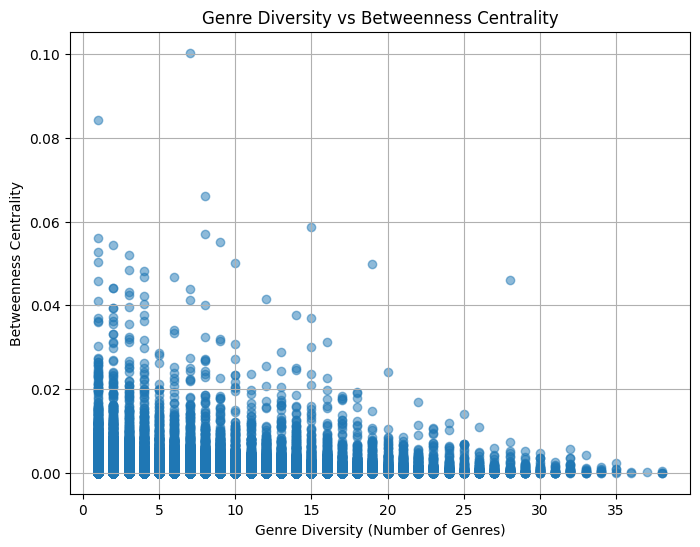

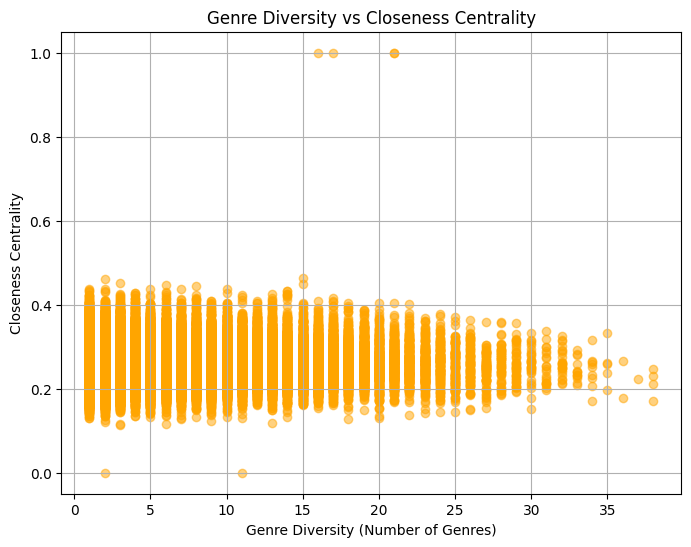

Correlation Matrix:
                        genre_count  betweenness_centrality  \
genre_count                1.000000               -0.013088   
betweenness_centrality    -0.013088                1.000000   
degree_centrality          0.008518                0.504159   
closeness_centrality       0.005894                0.459120   

                        degree_centrality  closeness_centrality  
genre_count                      0.008518              0.005894  
betweenness_centrality           0.504159              0.459120  
degree_centrality                1.000000              0.618145  
closeness_centrality             0.618145              1.000000  


In [13]:
input_csv_file = "node_data_HR_v2.csv"
df_nodes = pd.read_csv(input_csv_file)
node_data = pd.read_csv(input_csv_file)

# Step 1: Calculate Genre Diversity
node_data['genre_count'] = node_data['genres'].apply(lambda x: len(eval(x)))

# Step 2: Compute Correlation Matrix
correlations = node_data[['genre_count', 'betweenness_centrality', 'degree_centrality', 'closeness_centrality']].corr()

# Step 3: Save the Correlation Matrix to CSV
output_path = 'genre_diversity_centrality_correlations.csv'
correlations.to_csv(output_path)

# Print save confirmation
print(f"The correlations dataset has been saved to: {output_path}")

# Step 4: Visualizations

# Visualization 1: Genre Diversity vs Betweenness Centrality
plt.figure(figsize=(8, 6))
plt.scatter(node_data['genre_count'], node_data['betweenness_centrality'], alpha=0.5)
plt.title('Genre Diversity vs Betweenness Centrality')
plt.xlabel('Genre Diversity (Number of Genres)')
plt.ylabel('Betweenness Centrality')
plt.grid(True)
plt.show()

# Visualization 2: Genre Diversity vs Closeness Centrality
plt.figure(figsize=(8, 6))
plt.scatter(node_data['genre_count'], node_data['closeness_centrality'], alpha=0.5, color='orange')
plt.title('Genre Diversity vs Closeness Centrality')
plt.xlabel('Genre Diversity (Number of Genres)')
plt.ylabel('Closeness Centrality')
plt.grid(True)
plt.show()

# Display Correlation Matrix
print("Correlation Matrix:")
print(correlations)


# Genre Diversity and Betweenness Centrality

**Observation**: The scatter plot for Croatia reveals a weak and almost negligible relationship between genre diversity and betweenness centrality. Users with high genre diversity do not consistently exhibit high betweenness centrality.


**Insight**: Similar to Romania and Hungary, in Croatia, users with diverse musical tastes do not act as significant bridges between different communities. The network may have genre-specific clusters with limited bridging facilitated by individual users.

# Genre Diversity and Closeness Centrality

**Observation**: The scatter plot shows that users with a moderate number of genres (around 10–15) tend to have slightly higher closeness centrality. However, the relationship is still weak overall.


**Insight**: Users with moderate genre diversity might occupy central positions within communities, facilitating connections, but their influence does not extend significantly across the network.

# Correlation Matrix

**Key Findings:**
Genre Count vs Betweenness Centrality: A weak negative correlation (-0.013), suggesting no meaningful association.


**Genre Count vs Closeness Centrality:** A weak positive correlation (0.0058), indicating a minimal relationship.
Degree and Closeness Centrality: A moderate positive correlation (0.618), reflecting that users with more connections tend to be closer to others in the network.

# Comparison with Romania and Hungary

**Similarity:** Like Romania and Hungary, Croatia exhibits weak correlations between genre diversity and centrality measures.

**Difference**: In Croatia, users with moderate genre diversity (10–15 genres) have slightly more central roles compared to users with very high or low genre diversity.